#### 최적화 문제 
어떤 조건을 만족시키는 최적의 변수값을 찾는 문제 <br>


A fluid temperature 600'c flows through a pipeline. <br>
problem: 손실되는 열을 줄이기 <br>
<br>
solution <br>
1) heating(operational costs) <br>
2) installation of an insulation(investment costs) <br>

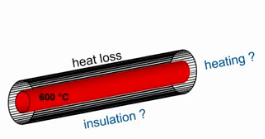

degree of freedom :  컨트롤 가능한 인자
<br>
위 문제에서 자유도는 1 - insulation thickness만 조절 가능 <br>
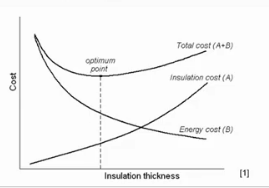

#### engineering 에서 최적화 문제를 풀 때 미적분이 중요하다 생각한다. <br>
1월에 회사에서 크레이짘 공업수학 강의 듣는 김에
실제 사용예시를 조금씩 찾아보려 한다.

# solve differential equations in python
참고: https://www.youtube.com/watch?v=VV3BnroVjZo 
<br>
시간에 관한 식 y가 있다고 하자. <br>
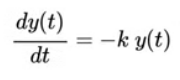 <br>
<br>
#### 파이썬으로 미분문제 풀기 <br>
scipy의 odeint 패키지로 y를 구할 수 있다.


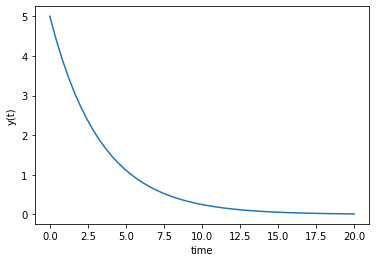

In [37]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
def model(y, u):
    k = 0.3
    dydt = -k*y
    return(dydt)

# initial condition
y0 = 5

# time points
t= np.linspace(0, 20) # 왠지 모르겠지만 50개 생김

# solve ode
y= odeint(model, y0, t)

# plot results
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

#### 손으로 푼문제랑 비교 <br>

In [29]:
print(f'코드에서 나온결과: {y[-1]}') # t = 20일때 y 값
print(f'손으로 푼 결과: {np.exp(-0.3*20 + np.log(5))}')

코드에서 나온결과: [0.01239376]
손으로 푼 결과: 0.012393760883331793


손으로 푼 문제에다가 t = 20, k = 0.3을 넣어보면
동일한 결과가 나오는 것을 확인 가능하다. <br>
대학때 알았으면 숙제 금방하는건데.. <br>
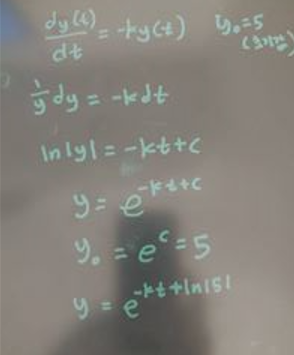

#### odeint에서는 k도 모델에서 따로 빼서 계산 가능하다.
k를 변수로 두고, 나중에 0.1이라고 넣어서 계산해보자 <br>
k1, k2, k3.. 여러개일 때도 args에 추가하면 된다.

In [36]:
# k도 따로 뺄 수 있다.

def model(y, u, k):
    dydt = -k*y
    return(dydt)

# initial condition
y0 = 5


# solve ode
k = 0.1
y2= odeint(model, y0, t, args = (k,))

print(f'코드에서 나온결과: {y[-1]}') # t = 20일때 y 값
print(f'손으로 푼 결과: {np.exp(-0.1*20 + np.log(5))}')

코드에서 나온결과: [0.6766764]
손으로 푼 결과: 0.6766764161830634


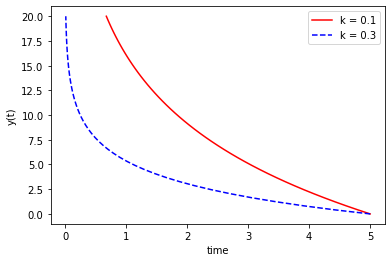

In [40]:
plt.plot(y2, t,'r-', label = 'k = 0.1' )
plt.plot(y, t, 'b--', label = 'k = 0.3')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()

#### 더많은 예제 보고싶으면 아래 참고 <br>
http://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations